In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sym

# 1.D

In [3]:
def System(r,t):

    x,y = r

    dxdt = 2*x -y
    dydt = x + 2*y

    return np.array([dxdt,dydt])

In [4]:
def RungeKutta(f, r, t, h):
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1,t)
    k3 = h * f(r + 0.5 * k2,t)
    k4 = h * f(r + k3, t)
    return (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [7]:
def IntegratorAdams(f,r0,t):
    #difine el paso
    h = t[1] - t[0]
    #______________________________________
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    x[0] = r0[0]
    y[0] = r0[1]
    for i in range(1,5):
        present = np.array([x[i-1],y[i-1]])
        p = RungeKutta(f,present,t[0],h)
        x[i] = x[i-1] + p[0]
        y[i] = y[i-1] + p[1]
    xc = x.copy()
    yc = y.copy()
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    K13 = np.zeros(2)
    K14 = np.zeros(2)
    for i in range(5,len(t)):
        
        present = np.array([x[i-1],y[i-1]])
        past_1 = np.array([x[i-2],y[i-2]])
        past_2 = np.array([x[i-3],y[i-3]])
        past_3 = np.array([x[i-4],y[i-4]])
        
        K11 = f(present,t[i-1])
        K12 = f(past_1,t[i-2])
        K13 = f(past_2,t[i-3])
        K14 = f(past_3,t[i-4])
        
        x[i] =   x[i-1] + h*((55/24)*K11[0]-(59/24)*K12[0]+(37/24)*K13[0]-(3/8)*K14[0])
        y[i] = y[i-1] + h*((55/24)*K11[1]-(59/24)*K12[1]+(37/24)*K13[1]-(3/8)*K14[1])
        
        xc[i] = x[i]
        yc[i] = y[i]
        
        # Futuro
        futuro = np.array([x[i],y[i]])
        Kmulton = f(futuro,t[i])
        
        xc[i] =  xc[i-1] +  h*((251)*Kmulton[0]+(646)*K11[0]-(264)*K12[0]+(106)*K13[0]-(19)*K14[0])/720
        yc[i] = yc[i-1] + h*((251)*Kmulton[1]+(646)*K11[1]-(264)*K12[1]+(106)*K13[1]-(19)*K14[1])/720
    return x,y,xc,yc

In [34]:
t = np.linspace(0,20,10000)
r0 = [0.5,0.5]
sol = IntegratorAdams(System,r0,t)

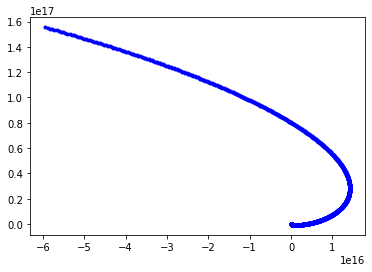

In [35]:
plt.scatter(sol[2],sol[3],marker='.',color='b')

el punto critico esta en (0,0)


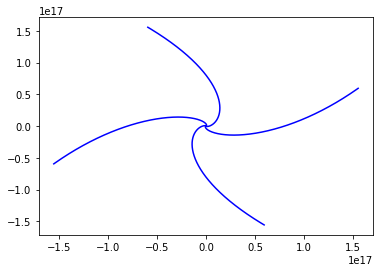

In [48]:
fig=plt.figure()
ax=fig.add_subplot()
r=[(0.5,0.5),(-0.5,0.5),(0.5,-0.5),(-0.5,-0.5)]

for i in r:
    answer=IntegratorAdams(System,i,t)
    ax.plot(answer[0],answer[1],c="b")
print("el punto critico esta en (0,0)")

# 1.B y 1.C

In [22]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
f = 2*x - y
g = x + 2*y
dfdx = sym.diff(f, x)
dfdy = sym.diff(f, y)
dgdx = sym.diff(g, x)
dgdy = sym.diff(g, y)

In [23]:
M_est = np.array([[int(dfdx), int(dfdy)],
                   [int(dgdx), int(dgdy)]])
eigenvalues, eigenvectors = np.linalg.eig(M_est)

In [24]:
print("valores propios: ",eigenvalues)
print("vectores propios: ",eigenvectors)

valores propios:  [2.+1.j 2.-1.j]
vectores propios:  [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


# 1.A

In [25]:
solucion = sym.solve((f, g), (x, y))

print("Solución:")
print(solucion)

Solución:
{x: 0, y: 0}
